In [5]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv('bank.csv')


In [7]:
# Check the first few rows
print(data.head())

# Check the shape of the data
print(data.shape)

# Get a summary of the data
print(data.info())
print(data.describe())


   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  
(11162, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data column

In [8]:
# Check for missing values
print(data.isnull().sum())


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


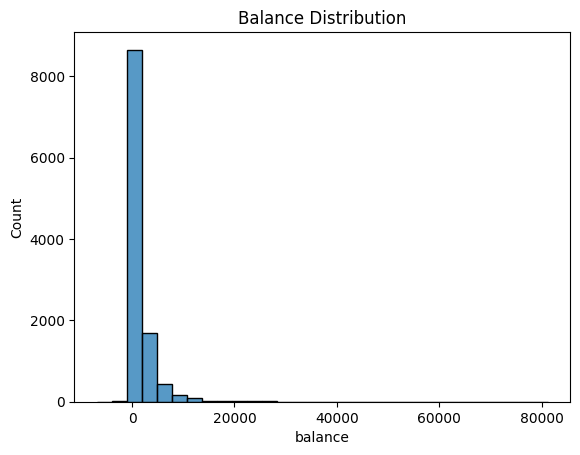

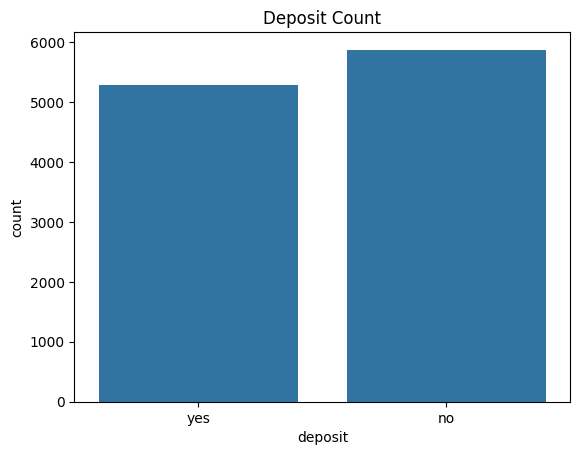

In [9]:

# Visualizing the distribution of numerical features
sns.histplot(data['balance'], bins=30)
plt.title('Balance Distribution')
plt.show()

# Countplot for categorical variables
sns.countplot(data=data, x='deposit')
plt.title('Deposit Count')
plt.show()


In [10]:
# Convert 'deposit' to binary values
data['deposit'] = data['deposit'].map({'yes': 1, 'no': 0})

# Initialize Label Encoder
label_encoder = LabelEncoder()

# Label encode categorical features
for column in ['job', 'marital', 'education', 'contact', 'month', 'poutcome', 'default', 'housing', 'loan']:
    data[column] = label_encoder.fit_transform(data[column])

# Separate features and target variable
X = data.drop('deposit', axis=1)
y = data['deposit']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


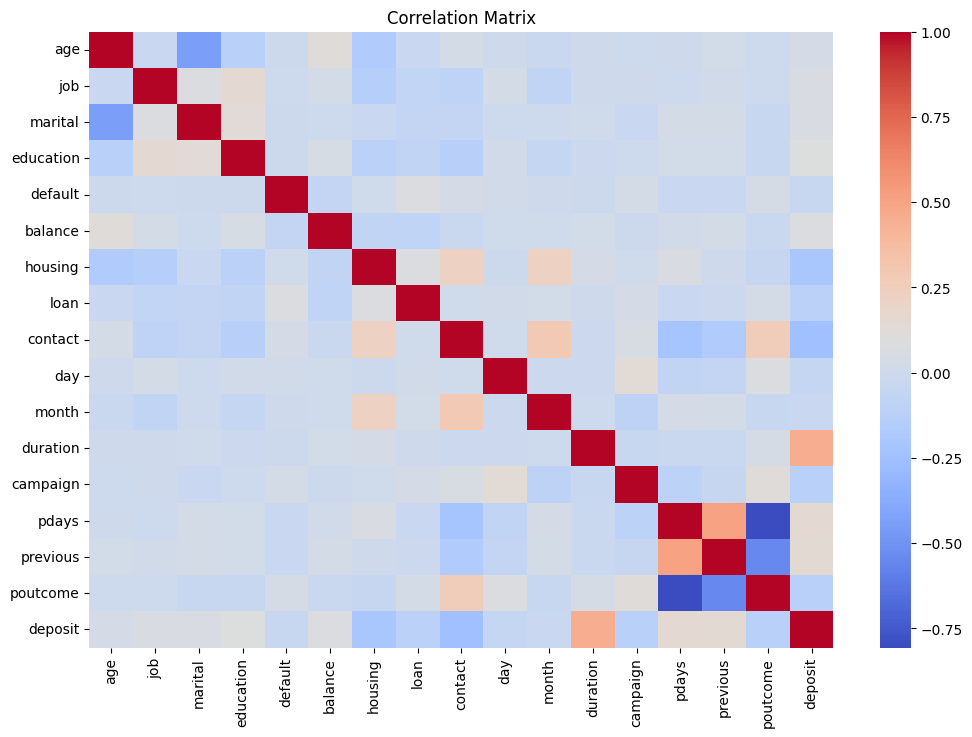

In [11]:
# Correlation matrix
correlation_matrix = data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


[[955 211]
 [258 809]]
              precision    recall  f1-score   support

           0       0.79      0.82      0.80      1166
           1       0.79      0.76      0.78      1067

    accuracy                           0.79      2233
   macro avg       0.79      0.79      0.79      2233
weighted avg       0.79      0.79      0.79      2233



In [14]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


[[914 252]
 [280 787]]
              precision    recall  f1-score   support

           0       0.77      0.78      0.77      1166
           1       0.76      0.74      0.75      1067

    accuracy                           0.76      2233
   macro avg       0.76      0.76      0.76      2233
weighted avg       0.76      0.76      0.76      2233



In [15]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


[[943 223]
 [152 915]]
              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1166
           1       0.80      0.86      0.83      1067

    accuracy                           0.83      2233
   macro avg       0.83      0.83      0.83      2233
weighted avg       0.83      0.83      0.83      2233



In [16]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

print(confusion_matrix(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))


[[945 221]
 [176 891]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.83      1166
           1       0.80      0.84      0.82      1067

    accuracy                           0.82      2233
   macro avg       0.82      0.82      0.82      2233
weighted avg       0.82      0.82      0.82      2233



In [17]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


[[961 205]
 [147 920]]
              precision    recall  f1-score   support

           0       0.87      0.82      0.85      1166
           1       0.82      0.86      0.84      1067

    accuracy                           0.84      2233
   macro avg       0.84      0.84      0.84      2233
weighted avg       0.84      0.84      0.84      2233



In [18]:
import lightgbm as lgb

lgbm = lgb.LGBMClassifier()
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)

print(confusion_matrix(y_test, y_pred_lgbm))
print(classification_report(y_test, y_pred_lgbm))


[LightGBM] [Info] Number of positive: 4222, number of negative: 4707
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004933 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 974
[LightGBM] [Info] Number of data points in the train set: 8929, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.472841 -> initscore=-0.108742
[LightGBM] [Info] Start training from score -0.108742
[[959 207]
 [132 935]]
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1166
           1       0.82      0.88      0.85      1067

    accuracy                           0.85      2233
   macro avg       0.85      0.85      0.85      2233
weighted avg       0.85      0.85      0.85      2233



In [19]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

print(confusion_matrix(y_test, y_pred_ada))
print(classification_report(y_test, y_pred_ada))


[[970 196]
 [232 835]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1166
           1       0.81      0.78      0.80      1067

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.81      2233



In [20]:
from sklearn.model_selection import GridSearchCV

param_grid_lr = {
    'C': [0.1,0.001, 1, 10, 100],
}
grid_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5)
grid_lr.fit(X_train, y_train)
print(grid_lr.best_params_)
# Perform Grid Search
grid_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5)
grid_lr.fit(X_train, y_train)

# Get best parameters
best_lr_params = grid_lr.best_params_
print("Best parameters for Logistic Regression:", best_lr_params)

# Train the model with the best parameters
best_lr_model = LogisticRegression(**best_lr_params)
best_lr_model.fit(X_train, y_train)

# Evaluate accuracy
accuracy_lr = best_lr_model.score(X_test, y_test)
print("Accuracy of Logistic Regression with best parameters:", accuracy_lr)

{'C': 10}
Best parameters for Logistic Regression: {'C': 10}
Accuracy of Logistic Regression with best parameters: 0.7899686520376176


In [21]:
from sklearn.tree import DecisionTreeClassifier

param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


# Perform Grid Search
grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5)
grid_dt.fit(X_train, y_train)

# Get best parameters
best_dt_params = grid_dt.best_params_
print("Best parameters for Decision Tree:", best_dt_params)

# Train the model with the best parameters
best_dt_model = DecisionTreeClassifier(**best_dt_params)
best_dt_model.fit(X_train, y_train)

# Evaluate accuracy
accuracy_dt = best_dt_model.score(X_test, y_test)
print("Accuracy of Decision Tree with best parameters:", accuracy_dt)


Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Accuracy of Decision Tree with best parameters: 0.8034034930586654


In [22]:
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Perform Grid Search
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
grid_rf.fit(X_train, y_train)

# Get best parameters
best_rf_params = grid_rf.best_params_
print("Best parameters for Random Forest:", best_rf_params)

# Train the model with the best parameters
best_rf_model = RandomForestClassifier(**best_rf_params)
best_rf_model.fit(X_train, y_train)

# Evaluate accuracy
accuracy_rf = best_rf_model.score(X_test, y_test)
print("Accuracy of Random Forest with best parameters:", accuracy_rf)


Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy of Random Forest with best parameters: 0.8302731751007613
